Name: Nicolas, Sean Julian S.<br>
Course and Section: CPE 019 - CPE32S3<br>
Date of Submission: February 7, 2024<br>
Instructor: Engr. Roman Richard<br>

## Lab - Correlation Analysis in Python

Objectives <br>
Part 1: The Dataset <br>
Part 2: Scatterplot Graphs and Correlatable Variables <br>
Part 3: Calculating Correlation with Python <br>
Part 4: Visualizing <br>


### Required Resources
1 PC with Internet access<br>
Jupyter notebook<br>

### Part 1: Dataset
You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychology
students at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, Block
Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. The
researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects.
Information about gender and body size (height and weight) are also included. The researchers withheld
the weights of two subjects and the height of one subject for reasons of confidentiality. Two simple
modifications were applied to the dataset:
1. Replace the quesion marks used to represent the withheld data points described above by the
'NaN' string. The substitution was done because Pandas does not handle the question marks
correctly.
2. Replace all tab characters with commas, converting the dataset into a CSV dataset.
The prepared dataset is saved as brainsize.txt.
Step 1: Loading the Dataset From a File.
Before the dataset can be used, it must be loaded onto memory.
In the code below, The first line imports the pandas modules and defines pd as a descriptor that refers to
the module.
The second line loads the dataset CSV file into a variable called brainFile.
The third line uses read_csv(), a pandas method, to convert the CSV dataset stored in brainFile into a
dataframe. The dataframe is then stored in the brainFrame variable.
Run the cell below to execute the described functions.

In [33]:
# Code Cell 1
import pandas as pd

# loading data set
brainFile = 'brainsize.txt'

# dataset to dataframe
brainFrame = pd.read_csv(brainFile, delim_whitespace=True)

Step 2: Verifying the dataframe.
To make sure the dataframe has been correctly loaded and created, use the head() method. Another
Pandas method, head() displays the first five entries of a dataframe.

In [34]:
# head function in orde to preview the contents
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


### Part 2: Scatterplot Graphs and Correlatable Variables

Step 1: The pandas describe() method.
The pandas module includes the describe() method which performs same common calculations
against a given dataset. In addition to provide common results including count, mean, standard
deviation, minimum, and maximum, describe() is also a great way to quickly test the validity of the
values in the dataframe.
Run the cell below to output the results computed by describe() against the brainFrame dataframe.

In [35]:
# performs common calculations to dataset
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Step 2: Scatterplot graphs
Scatterplot graphs are important when working with correlations as they allow for a quick visual
verification of the nature of the relationship between the variables. This lab uses the Pearson correlation
coefficient, which is sensitive only to a linear relationship between two variables. Other more robust 
correlation methods exist but are out of the scope of this lab.<br>

a. Load the required modules.<br>

Before graphs can be plotted, it is necessary to import a few modules, namely numpy and matplotlib.
Run the cell below to load these modules.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

b. Separate the data.
To ensure the results do not get skewed because of the differences in male and female bodies, the
dateframe is split into two dataframes: one containing all male entries and another with only female
instances.
Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the
respective entries.

In [37]:
# data split into two by Gender
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

c. Plot the graphs. 

Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line
below uses Pandas mean() method to calculate the mean value between the three and store the result in
the menMeanSmarts variable. Notice that the first line also refers to the menDf, the filtered dataframe
containing only male entries.

The second line uses the matplotlib method scatter() to create a scatterplot graph between the
menMeanSmarts variable and the MRI_Countattribute. The MRI_Count in this dataset can be thought as of
a measure of the physical size of the subjects' brains.

The third line simply displays the graph.

The fourth line is used to ensure the graph will be displayed in this notebook.

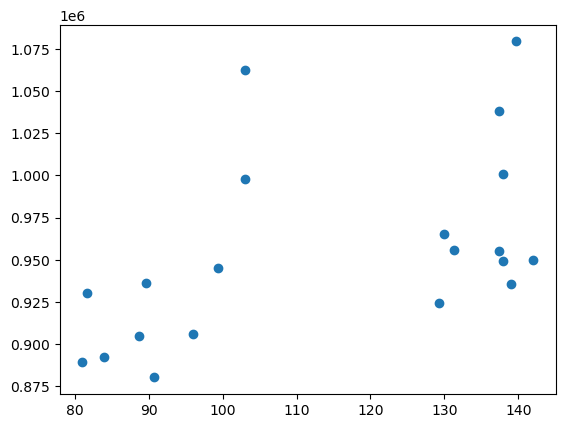

In [38]:
# mean value between PIQ, FSIQ, and VIQ | only for male Gender
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)

# used scatter function to plot MeanSmarts of men and size of the subject's brain
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

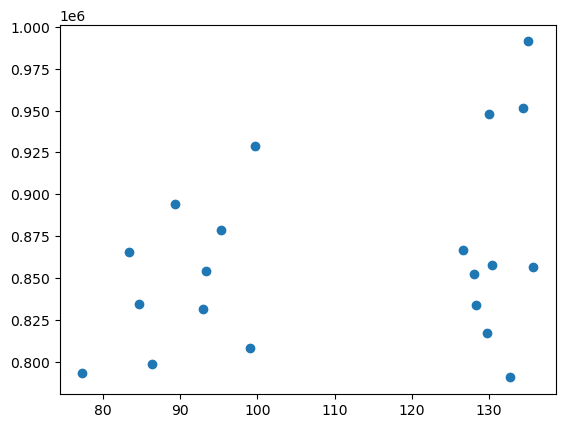

In [39]:
# mean value between PIQ, FSIQ, and VIQ | only for female Gender
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)

# used scatter function to plot MeanSmarts of women and size of the subject's brain
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline

### Part 3: Calculating Correlation with Python
Step 1: Calculate correlation against brainFrame.

The pandas corr() method provides an easy way to calculate correlation against a dataframe. By simply
calling the method against a dataframe, one can get the correlation between all variables at the same
time.

In [40]:
# calculate correlation between the variables
brainFrame.corr(method='pearson')

C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\1561973713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled
with 1s? Is that a coincidence? Explain.

- It is not a coincidence, This happens because it is comparing its value to itself. The closer the value is to 1, the higher the relationship between the two variables.

Still looking at the correlation table above, notice that the values are mirrored; values below the 1
diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.

- There are mirrored counter part since they are the same variables being compared to each other. This results in a duplicate value since the variables are being compared to each other twice in a table.

Using the same corr() method, it is easy to calculate the correlation of the variables contained in the
female-only dataframe:


In [41]:
# calculate correlation between the variables for only female gender
womenDf.corr(method='pearson')

C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\1249820013.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [42]:
# calculate correlation between the variables for only male gender
menDf.corr(method='pearson')

C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\2517740925.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


### Part 4: Visualizing
Step 1: Install Seaborn.

To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored
squares, heatmap graphs can help identify correlations in a glance.
The Python module named seaborn makes it very easy to plot heatmap graphs.

First, run the cell below to download and install the seaborn module.

In [15]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Step 2: Plot the correlation heatmap.
Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the
cell below:

Line 1: Generates a correlation table based on the womenNoGenderDf dataframe and stores it on wcorr.

Line 2: Uses the seaborn heatmap() method to generate and plot the heatmap. Notice that heatmap()
takes wcorr as a parameter.

Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it
has the comment # character preceding it, forcing the interpreter to ignore it), it was kept for
informational purposes.

C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\3809214714.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

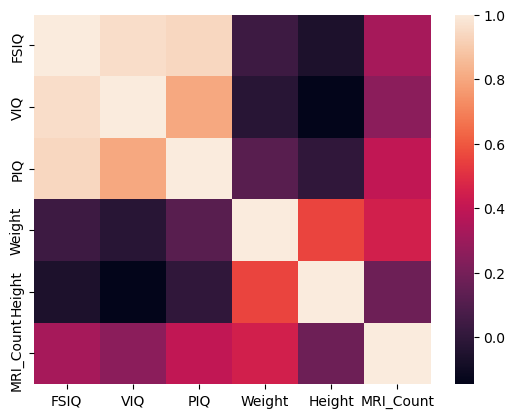

In [43]:
import seaborn as sns
wcorr = womenDf.corr()

# creating a heatmap image based on the correlational table of women dataframe
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\2815386289.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

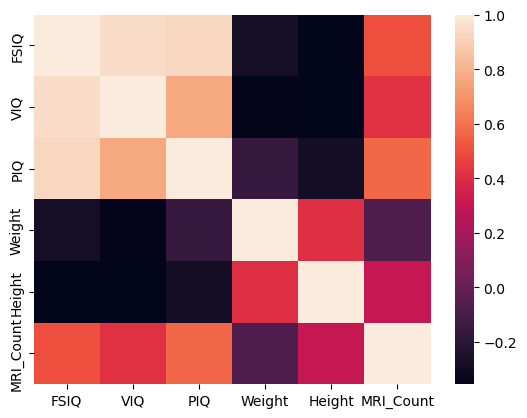

In [44]:
mcorr = menDf.corr()

# creating a heatmap image based on the correlational table of men dataframe
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Many variable pairs present correlation close to zero. What does that mean?
- This means that these variables has very minimal relation with the each other. The higher the value, the higher the correlation between two variable. The lower the value, the lower correlation exist between the two variable.

Why separate the genders?

- To ensure that the results do not get skewed because of the difference between the bodies of male and female. Biologically, the body of the average female is smaller than the body of an average male. This allows us to get a more clear result by isolating the two genders and only comparing their variables to subjects with the same gender.

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.
- FSIQ, VIQ, and PIQ has a stonger correlation with brain size compared to the other variables such as weight and height. An assumption that can be made that a bigger brain size has a higher FSIQ, VIQ, and PIQ. Personally, I did not expect this result since I've read from previous articles that bran size does not contribute to intelligence, but maybe with more data to get more accuracy we can be able to have a more valid assumption.


### Supplementary Activity:

In [46]:
# Loaded datasets of apples
appleFile = 'apple_quality.csv'

appleFrame = pd.read_csv(appleFile)

In [48]:
# Preview of the few rows to chech the data set
appleFrame.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [56]:
# Split apples between good and bad
goodap = appleFrame[(appleFrame.Quality == 'good')]
badap = appleFrame[(appleFrame.Quality == 'bad')]

In [53]:
# used pearson method
appleFrame.corr(method='pearson')

C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\680917323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  appleFrame.corr(method='pearson')


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
A_id,1.000000,-0.028911,-0.005730,-0.002378,-0.013111,0.006179,0.000742
Size,-0.028911,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773
Weight,-0.005730,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824
Sweetness,-0.002378,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800
Crunchiness,-0.013111,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982
Juiciness,0.006179,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144
Ripeness,0.000742,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000


In [57]:
goodap.corr(method='pearson')

C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\103354724.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  goodap.corr(method='pearson')


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
A_id,1.000000,-0.053088,0.008011,0.009959,-0.038647,0.012809,-0.024097
Size,-0.053088,1.000000,-0.284417,-0.467143,0.161248,-0.010208,0.165581
Weight,0.008011,-0.284417,1.000000,-0.222240,-0.159718,-0.209415,-0.278118
Sweetness,0.009959,-0.467143,-0.222240,1.000000,-0.181593,0.149607,0.054865
Crunchiness,-0.038647,0.161248,-0.159718,-0.181593,1.000000,-0.104983,-0.135736
Juiciness,0.012809,-0.010208,-0.209415,0.149607,-0.104983,1.000000,-0.294991
Ripeness,-0.024097,0.165581,-0.278118,0.054865,-0.135736,-0.294991,1.000000


In [58]:
badap.corr(method='pearson')

C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\2301619241.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  badap.corr(method='pearson')


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
A_id,1.000000,-0.006385,-0.025512,-0.017872,0.021580,-0.001342,0.026245
Size,-0.006385,1.000000,-0.007087,-0.346907,0.206501,-0.162808,-0.324418
Weight,-0.025512,-0.007087,1.000000,-0.072695,0.028091,0.031632,-0.232406
Sweetness,-0.017872,-0.346907,-0.072695,1.000000,0.169701,-0.067993,-0.486456
Crunchiness,0.021580,0.206501,0.028091,0.169701,1.000000,-0.466129,-0.319040
Juiciness,-0.001342,-0.162808,0.031632,-0.067993,-0.466129,1.000000,0.173087
Ripeness,0.026245,-0.324418,-0.232406,-0.486456,-0.319040,0.173087,1.000000


C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\3903834517.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  goodcorr = goodap.corr()


<Axes: >

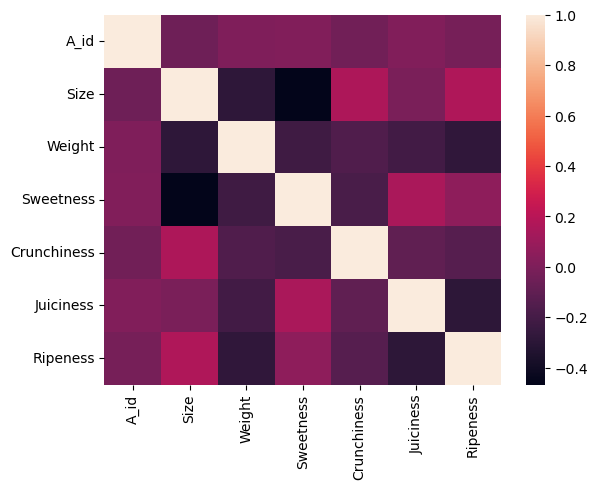

In [59]:
goodcorr = goodap.corr()

# creating a heatmap image based on the correlational table of good apples dataframe
sns.heatmap(goodcorr)

#### In this image we can see a slight correlation between crunchiness and size, size and ripeness, sweetness and juicines.

C:\Users\TIPQC\AppData\Local\Temp\ipykernel_2600\1367826283.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  badcorr = badap.corr()


<Axes: >

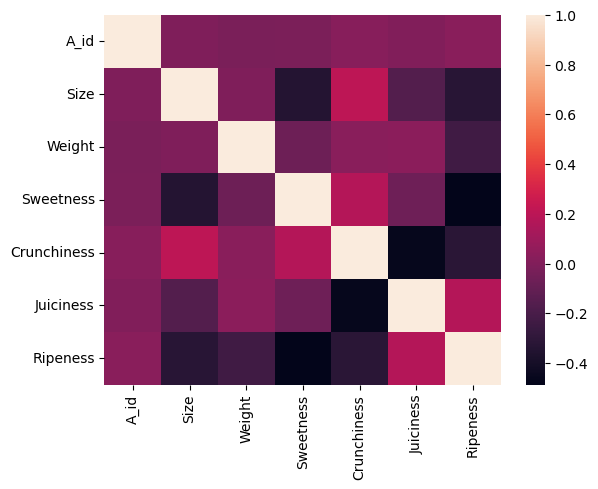

In [60]:
badcorr = badap.corr()

# creating a heatmap image based on the correlational table of bad apple dataframe
sns.heatmap(badcorr)

#### In this image there is a correlation between size and crunches, juiceness and ripeness, sweetness and crunches

#### Conclusion

I was able to learn how to conduct data analysis and find correlation between the variables. In the procedure part of the activity, I was able to learn different methods to display and analyze the variables that are present in the data set. In the supplementary part of this activity, I was able to implement all of my knowlede that I've gained while doin gthe procedures and was able to apply a dataset that I downloaded in the internet